In [1]:
import numpy as np
import pandas as pd
import os
from PIL.Image import open
import matplotlib.pyplot as plt
from PIL import ImageOps
import random 

In [2]:
#Paths
Path_img = "C:/Users/SEBASTIAN/OneDrive - Universidad de los Andes/Documentos/img_aug/x_aug/"
#Path_mask = "C:/Users/SEBASTIAN/OneDrive - Universidad de los Andes/Documentos/img_aug/y_aug/"

Path_mask = "C:/Users/SEBASTIAN/OneDrive - Universidad de los Andes/OctavoSemestre/Robocol_vision/Img/Set1_Mask_Gray/Imagenes/"

weights_path = "C:/Users/SEBASTIAN/OneDrive - Universidad de los Andes/Documentos/img_aug/weights/"
path_csv = "C:/Users/SEBASTIAN/OneDrive - Universidad de los Andes/Documentos/img_aug/weights/logger.csv"

#Path list images
img_paths = [
    os.path.join(Path_img, fname)
    for fname in os.listdir(Path_img)
]

mask_paths = [
    os.path.join(Path_mask, fname)
    for fname in os.listdir(Path_mask)    
]


### Pruebas externas que se hicieron

In [16]:
def displayNormal(displey_list):
    for i in range(len(displey_list)):
        plt.subplot(1,len(displey_list),i+1)
        plt.imshow(displey_list[i])
    plt.show()

def displayClass(display_list):
    for i in range(len(display_list)):
        plt.subplot(1,len(display_list),i+1)
        print(i)
        if i == 0:
            img = ImageOps.autocontrast(display_list[i])
            plt.imshow(img)
            #plt.imshow(display_list[i])
        else:
            plt.imshow(display_list[i])
    plt.show()
        
    


In [24]:
prueba_mask = mask_paths[0]
prueba_img = img_paths[0]
prueba_mask = open(prueba_mask)
prueba_img = open(prueba_img)
prueba_mask = np.asarray(prueba_mask)
pruebas_img = np.asarray(prueba_img)
#prueba_mask.show()

In [25]:
prueba_mask = np.reshape(prueba_mask,(-1,1))
print(prueba_mask.shape)

(307200, 1)


In [26]:
df_prueba_mask = pd.DataFrame(prueba_mask)
df_prueba_mask.head()

,0
0,6
1,6
2,6
3,6
4,6


In [31]:
pd_values = df_prueba_mask.value_counts()
print(df_prueba_mask.value_counts())

2    214449
6     64083
7     24958
1      3241
5       454
0        15
dtype: int64


In [33]:
valores = np.asarray(pd_values)
idx = np.asarray(pd_values.index)
print(idx)

[(2,) (6,) (7,) (1,) (5,) (0,)]


In [34]:
valores

array([214449,  64083,  24958,   3241,    454,     15], dtype=int64)

In [38]:
almacenar = np.zeros(9,dtype='int64')
for i,value in enumerate(idx):
    almacenar[value[0]] = valores[i]

almacenar = np.reshape(almacenar,(1,-1))
print(almacenar) 
        
column_name = [str(i) for i in range(9)]
print(column_name)

[[    15   3241 214449      0      0    454  64083  24958      0]]
['0', '1', '2', '3', '4', '5', '6', '7', '8']


In [39]:
final_pd = pd.DataFrame(almacenar,columns=column_name)

In [40]:
final_pd.head()

,0,1,2,3,4,5,6,7,8
0,15,3241,214449,0,0,454,64083,24958,0


In [3]:
def create_super_df(path_mask):
    column_name = [str(i) for i in range(11)]
    analizar = pd.DataFrame(columns=column_name)
    for path in path_mask:
        mask = open(path)
        mask = np.asarray(mask)
        mask = np.reshape(mask,(-1,1))
        df_mask = pd.DataFrame(mask)
        value_count = df_mask.value_counts()
        idx = value_count.index
        #print("Estos son los indices=",idx)
        value = np.asarray(value_count)
        #print("Estos son los valores=", value)
        #print("\n")
        almacenar = np.zeros(11,dtype='int64')
        for i,val in enumerate(idx):
            almacenar[val[0]] = value[i]
        almacenar = np.reshape(almacenar,(1,-1))
        analizar=analizar.append(pd.DataFrame(almacenar,columns=column_name),ignore_index=True)
    return analizar
        

important_dataFrame = create_super_df(mask_paths)   
        
        

In [4]:
important_dataFrame.sum()

0           43
1       620848
2        56432
3     17754677
4            0
5            0
6            0
7            0
8            0
9            0
10           0
dtype: object

In [63]:
important_dataFrame.head()

,0,1,2,3,4,5,6,7,8,9,10
0,15,3241,214449,0,0,454,64083,24958,0,0,0
1,17,3637,223459,0,0,0,53164,26923,0,0,0
2,12,3187,218753,0,0,0,59132,26116,0,0,0
3,11,3196,218896,0,0,0,59312,25785,0,0,0
4,16,3191,214798,0,0,282,63653,25260,0,0,0


<BarContainer object of 11 artists>

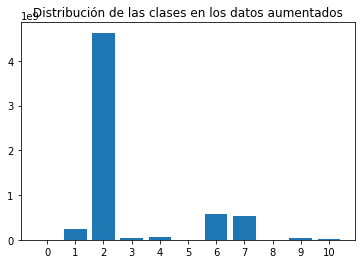

In [76]:
suma = important_dataFrame.sum()
values = np.asarray(suma)
idx = suma.index
plt.title("Distribución de las clases en los datos aumentados")
plt.bar(idx,values)

In [78]:
#Paths
Path_img = "C:/Users/SEBASTIAN/OneDrive - Universidad de los Andes/Documentos/img_aug/x/"
Path_mask = "C:/Users/SEBASTIAN/OneDrive - Universidad de los Andes/Documentos/img_aug/y/"

#Path list images
img_paths = [
    os.path.join(Path_img, fname)
    for fname in os.listdir(Path_img)
]

mask_paths = [
    os.path.join(Path_mask, fname)
    for fname in os.listdir(Path_mask)    
]


In [85]:
important_dataFrame_2 = create_super_df(mask_paths)
important_dataFrame_2.sum()

0          346
1       818301
2     15709988
3       140525
4       250492
5       807478
6      4485973
7      2201037
8         2733
9       123848
10       35279
dtype: object

<BarContainer object of 11 artists>

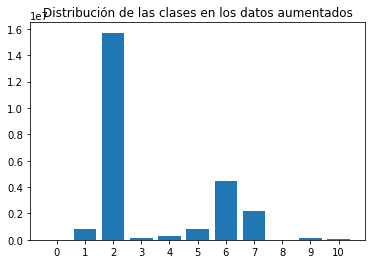

In [84]:
suma_2 =important_dataFrame_2.sum()
values = np.asarray(suma_2)
idx = suma.index
plt.title("Distribución de las clases en los datos aumentados")
plt.bar(idx,values)

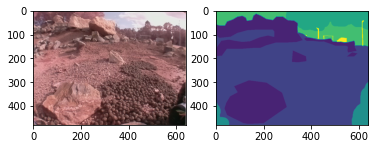

In [102]:
idx = random.randint(0,len(mask_paths))
img_mask = open(mask_paths[idx])
img_mask_contrast = ImageOps.autocontrast(img_mask)
img = open(img_paths[idx])
img_mask = np.asarray(img_mask_contrast)
img = np.asarray(img)

imagenes = [img,img_mask]
for i,v in enumerate(imagenes):
    plt.subplot(1,len(imagenes),i+1)
    plt.imshow(v)
plt.show()